# **Azure api, Optical Character Recognition, OCR**

In [13]:
# Import packages
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO

In [14]:
# Key and endpoint for api use

sub_key = 'key value'
endpoint = 'endpoint' + '/vision/v2.0/ocr'

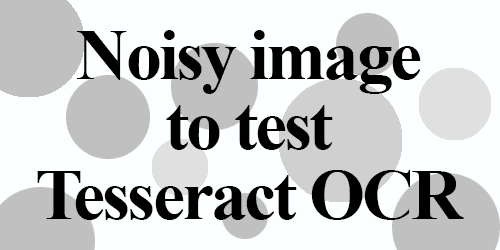

In [15]:
# Prepare image

image_url = 'https://929687.smushcdn.com/2633864/wp-content/uploads/2017/06/example_01.png?lossy=1&strip=1&webp=1'
image = Image.open(BytesIO(requests.get(image_url).content))

image

In [16]:
# Set headers
headers = {'Ocp-Apim-Subscription-Key':sub_key}
params = {'language':'unk', 'detectOrientation':'true'}
data = {'url':image_url}

In [17]:
# Get detected data use api
response = requests.post(endpoint, headers=headers, params=params, json=data)
result = response.json()

result

{'language': 'en',
 'textAngle': 0.026179938779915528,
 'orientation': 'Up',
 'regions': [{'boundingBox': '36,26,426,199',
   'lines': [{'boundingBox': '78,26,344,72',
     'words': [{'boundingBox': '78,26,164,67', 'text': 'Noisy'},
      {'boundingBox': '251,30,171,68', 'text': 'image'}]},
    {'boundingBox': '166,103,167,49',
     'words': [{'boundingBox': '166,103,53,46', 'text': 'to'},
      {'boundingBox': '235,105,98,47', 'text': 'test'}]},
    {'boundingBox': '36,165,426,60',
     'words': [{'boundingBox': '36,165,259,56', 'text': 'Tesseract'},
      {'boundingBox': '310,172,152,53', 'text': 'OCR'}]}]}]}

In [18]:
# Get words from JSON
def getWords(result):
  for line in result['regions'][0]['lines']:
    words = line['words']

    for word in words:
      text = word['text']
      print(text)

getWords(result)

Noisy
image
to
test
Tesseract
OCR


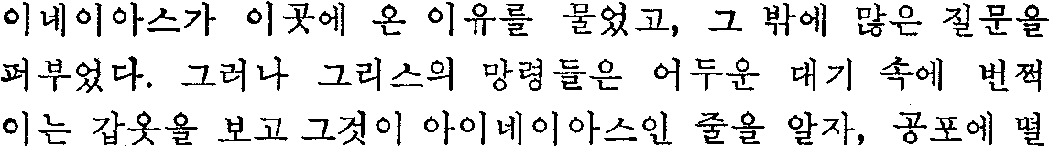

In [19]:
# Test Korean image

image_url = 'https://how-ocr-works.com/languages/korean-alphabet/korean-text.png'
image = Image.open(BytesIO(requests.get(image_url).content))

image

In [20]:
headers = {'Ocp-Apim-Subscription-Key':sub_key}
params = {'language':'ko', 'detectOrientation':'true'}
data = {'url':image_url}

In [21]:
response = requests.post(endpoint, headers=headers, params=params, json=data)
result = response.json()
result

{'language': 'ko',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '1,1,1048,145',
   'lines': [{'boundingBox': '4,1,1045,36',
     'words': [{'boundingBox': '4,2,212,35', 'text': '이니]이아스가'},
      {'boundingBox': '247,1,98,35', 'text': '이곳에'},
      {'boundingBox': '372,4,34,32', 'text': '온'},
      {'boundingBox': '428,2,105,34', 'text': '이유를'},
      {'boundingBox': '563,2,115,35', 'text': '물었고,'},
      {'boundingBox': '708,10,34,21', 'text': '그'},
      {'boundingBox': '763,3,63,34', 'text': '밖에'},
      {'boundingBox': '856,3,66,34', 'text': '많은'},
      {'boundingBox': '943,3,106,34', 'text': '질문을'}]},
    {'boundingBox': '1,56,612,37',
     'words': [{'boundingBox': '1,56,151,37', 'text': '퍼부었다.'},
      {'boundingBox': '181,56,108,36', 'text': '그러나'},
      {'boundingBox': '318,57,135,34', 'text': '그리스의'},
      {'boundingBox': '483,58,130,33', 'text': '망령들。'}]},
    {'boundingBox': '654,56,388,36',
     'words': [{'boundingBox': '654,57,106,34', 'text': 

In [22]:
getWords(result)

이니]이아스가
이곳에
온
이유를
물었고,
그
밖에
많은
질문을
퍼부었다.
그러나
그리스의
망령들。
어두운
대기
속에
번찍
이는
갑옷을
보고
그것이
아이네이아스인
줄을
알자,
공포에
떨
